In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import geoplot
import geopandas as gpd

from geopandas import GeoDataFrame

In [113]:
path = "data/2015-street-tree-census-tree-data.csv"
df = pd.read_csv(path)

In [114]:
pd.set_option('display.max_columns', None)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [116]:
df.head(5)

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common steward  \
0  Alive   Fair                         Acer rubrum        red maple     NaN   
1  Alive   Fair                   Quercus palustris          pin oak     NaN   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust    1or2   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust     NaN   
4  Alive   Good                     Tilia americana  American linden     NaN   

  guards  sidewalk         user_type problems root_stone root_grate  \
0    NaN  NoDamage  TreesCount Staff      NaN         No         No   
1    NaN    Damage  TreesCount Staff   Stones        Yes         No   
2    NaN    Damage         Volunteer      NaN         No         No   
3    NaN    Damage         Volunteer   Stones        Yes         No   
4    NaN    Damage         Volunteer   Stones        Yes         No   

  root_other trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0         No         No         No         No         No        No         No   
1         No         No         No         No         No        No         No   
2         No         No         No         No         No        No         No   
3         No         No         No         No         No        No         No   
4         No         No         No         No         No        No         No   

             address  postcode      zip_city  community board  borocode  \
0  108-005 70 AVENUE     11375  Forest Hills              406         4   
1   147-074 7 AVENUE     11357    Whitestone              407         4   
2  390 MORGAN AVENUE     11211      Brooklyn              301         3   
3  1027 GRAND STREET     11211      Brooklyn              301         3   
4       603 6 STREET     11215      Brooklyn              306         3   

    borough  cncldist  st_assem  st_senate   nta            nta_name  boro_ct  \
0    Queens        29        28         16  QN17        Forest Hills  4073900   
1    Queens        19        27         11  QN49          Whitestone  4097300   
2  Brooklyn        34        50         18  BK90   East Williamsburg  3044900   
3  Brooklyn        34        53         18  BK90   East Williamsburg  3044900   
4  Brooklyn        39        44         21  BK37  Park Slope-Gowanus  3016500   

      state   latitude  longitude         x_sp         y_sp  council district  \
0  New York  40.723092 -73.844215  1027431.148  202756.7687              29.0   
1  New York  40.794111 -73.818679  1034455.701  228644.8374              19.0   
2  New York  40.717581 -73.936608  1001822.831  200716.8913              34.0   
3  New York  40.713537 -73.934456  1002420.358  199244.2531              34.0   
4  New York  40.666778 -73.975979   990913.775  182202.4260              39.0   

   census tract        bin           bbl  
0         739.0  4052307.0  4.022210e+09  
1         973.0  4101931.0  4.044750e+09  
2         449.0  3338310.0  3.028870e+09  
3         449.0  3338342.0  3.029250e+09  
4         165.0  3025654.0  3.010850e+09

In [117]:
df.shape

(683788, 45)

In [118]:
#Возвращает лист колонок в которых нулевые данные с подсчетом процента сколько всего пропусков
def get_all_columns_with_null_with_percent(df):
    if check_pass_obj(df):
        lst_out = []
        for col in df.columns:
            pct_missing = np.mean(df[col].isnull())
            if pct_missing != 0.0:
                lst_out.append('{} - {}%'.format(col, round(pct_missing * 100)))
        return lst_out
    else:
        raise TypeError("Data must be a Pandas DataFrame")
    

def check_pass_obj(df):
    if isinstance(df, pd.DataFrame):
        return True
    else:
        return False
    

get_all_columns_with_null_with_percent(df)

['health - 5%',
 'spc_latin - 5%',
 'spc_common - 5%',
 'steward - 76%',
 'guards - 88%',
 'sidewalk - 5%',
 'problems - 67%',
 'council district - 1%',
 'census tract - 1%',
 'bin - 1%',
 'bbl - 1%']

In [119]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['tree_id', 'block_id', 'tree_dbh', 'stump_diam', 'postcode',
       'community board', 'borocode', 'cncldist', 'st_assem', 'st_senate',
       'boro_ct', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')


In [120]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['created_at', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'zip_city',
       'borough', 'nta', 'nta_name', 'state'],
      dtype='object')


In [121]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   created_at  683788 non-null  object
 1   curb_loc    683788 non-null  object
 2   status      683788 non-null  object
 3   health      652172 non-null  object
 4   spc_latin   652169 non-null  object
 5   spc_common  652169 non-null  object
 6   steward     164350 non-null  object
 7   guards      79866 non-null   object
 8   sidewalk    652172 non-null  object
 9   user_type   683788 non-null  object
 10  problems    225844 non-null  object
 11  root_stone  683788 non-null  object
 12  root_grate  683788 non-null  object
 13  root_other  683788 non-null  object
 14  trunk_wire  683788 non-null  object
 15  trnk_light  683788 non-null  object
 16  trnk_other  683788 non-null  object
 17  brch_light  683788 non-null  object
 18  brch_shoe   683788 non-null  object
 19  brch_other  683788 non-

In [122]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   tree_dbh          683788 non-null  int64  
 3   stump_diam        683788 non-null  int64  
 4   postcode          683788 non-null  int64  
 5   community board   683788 non-null  int64  
 6   borocode          683788 non-null  int64  
 7   cncldist          683788 non-null  int64  
 8   st_assem          683788 non-null  int64  
 9   st_senate         683788 non-null  int64  
 10  boro_ct           683788 non-null  int64  
 11  latitude          683788 non-null  float64
 12  longitude         683788 non-null  float64
 13  x_sp              683788 non-null  float64
 14  y_sp              683788 non-null  float64
 15  council district  677269 non-null  float64
 16  census tract      67

In [123]:
num_missing = df.isna().sum()
num_missing

tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health               31616
spc_latin            31619
spc_common           31619
steward             519438
guards              603922
sidewalk             31616
user_type                0
problems            457944
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state                    0
l

In [124]:
pct_missing = df.isna().mean()
pct_missing[:10]

tree_id       0.000000
block_id      0.000000
created_at    0.000000
tree_dbh      0.000000
stump_diam    0.000000
curb_loc      0.000000
status        0.000000
health        0.046237
spc_latin     0.046241
spc_common    0.046241
dtype: float64

<Axes: >

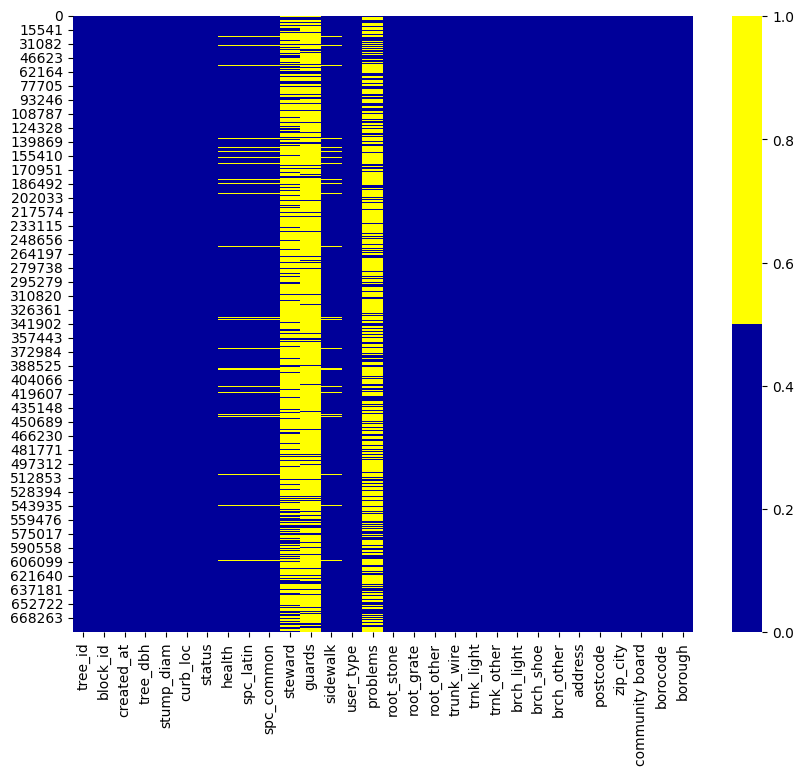

In [125]:
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

<Axes: >

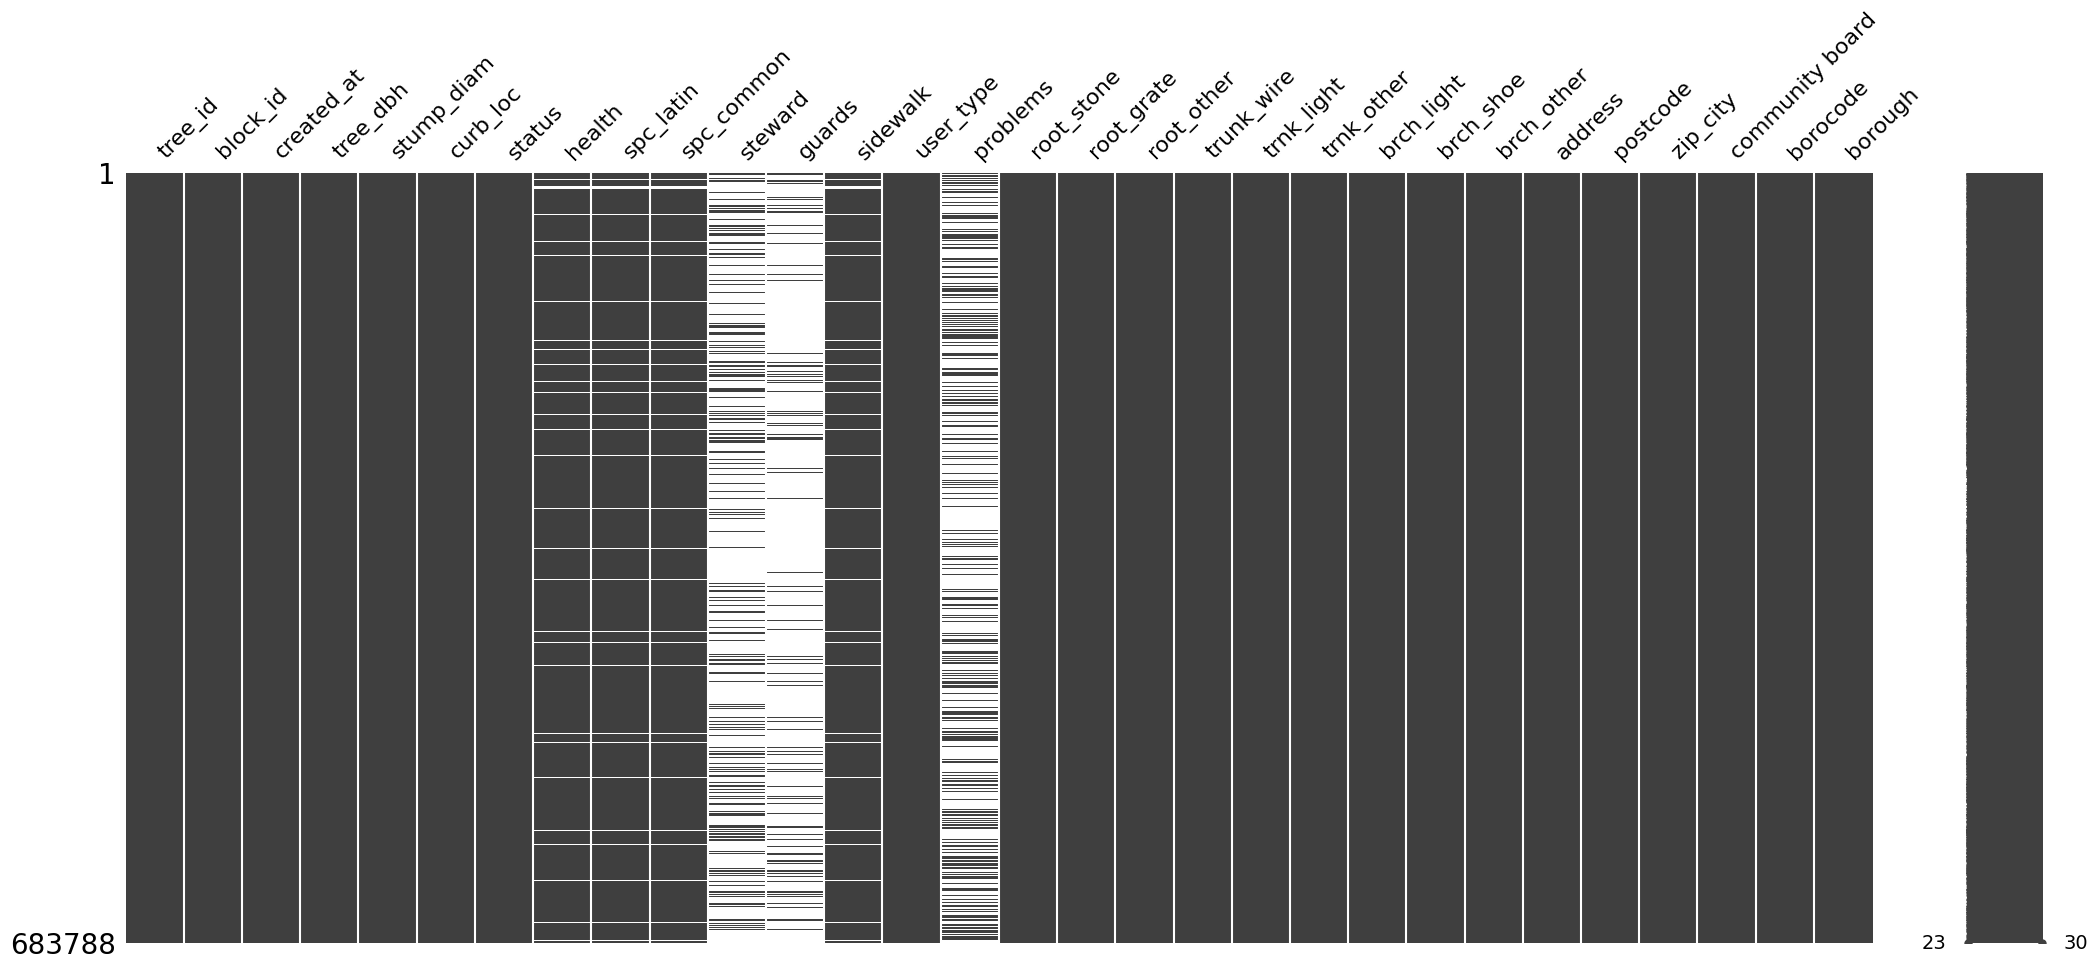

In [126]:
msno.matrix(df.iloc[:, :30])

<Axes: >

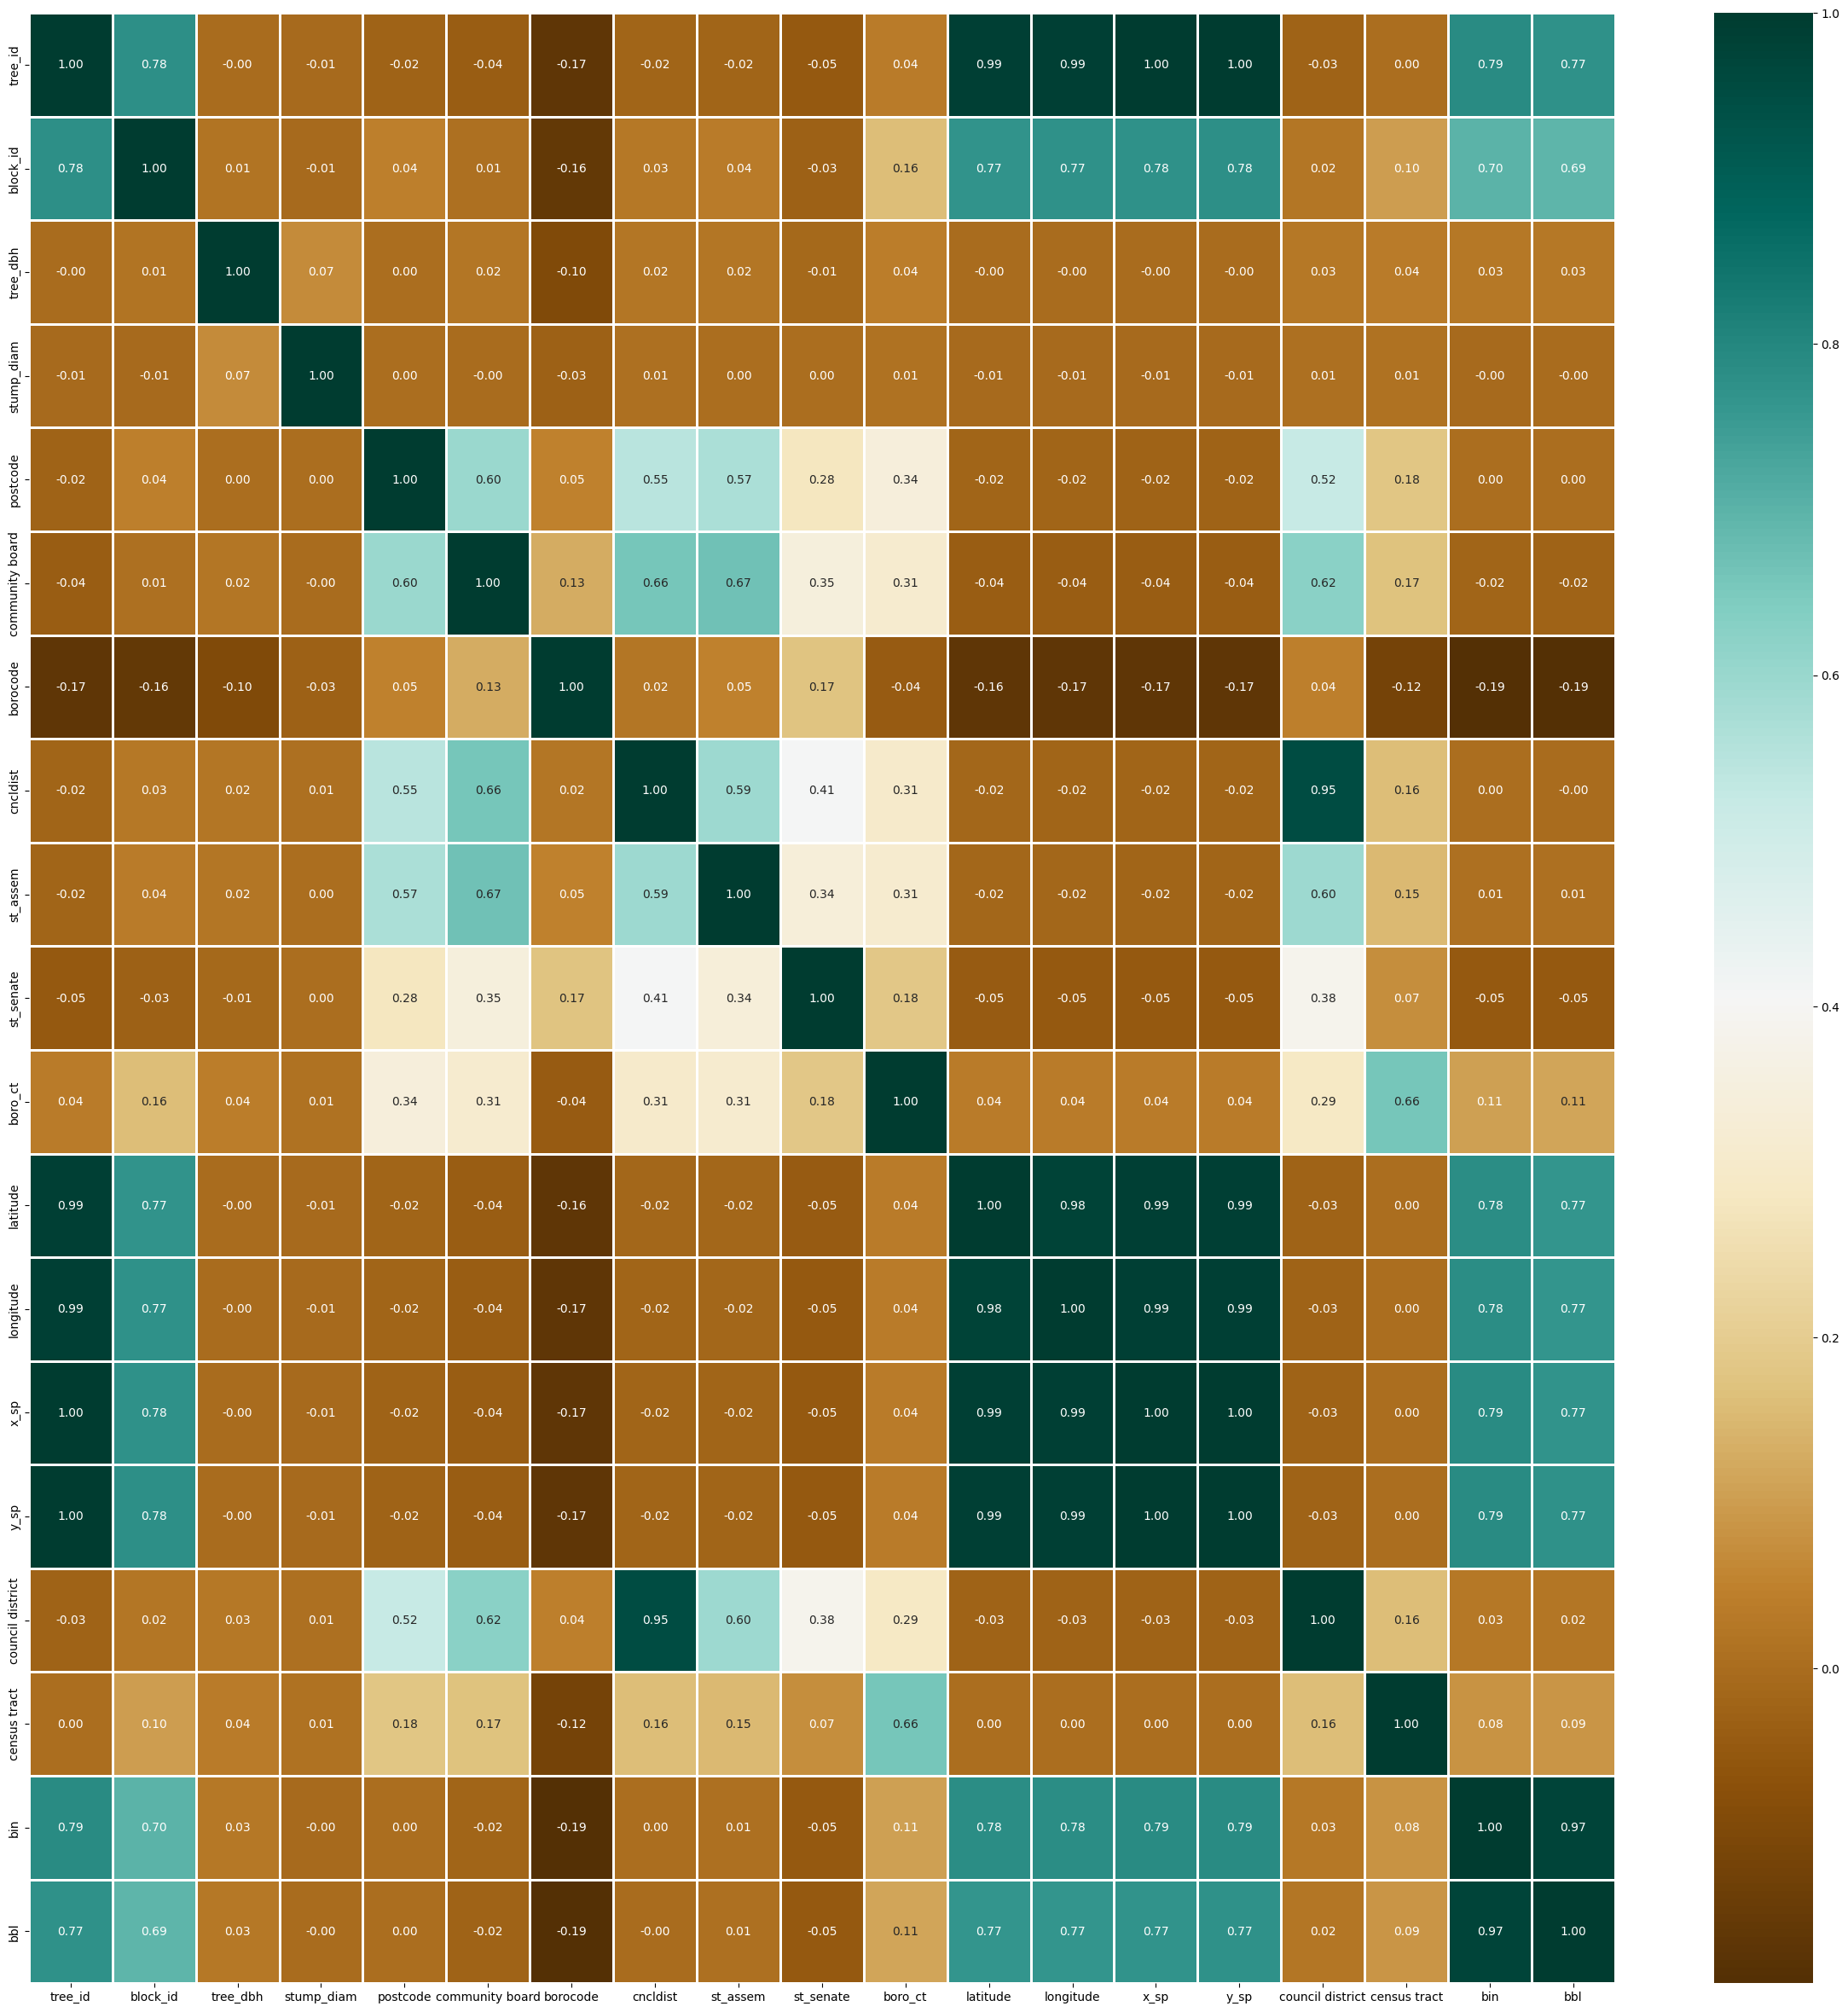

In [127]:
train_df_numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(30, 30))
sns.heatmap(train_df_numeric.apply(lambda x: x.factorize()[0]).corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: >

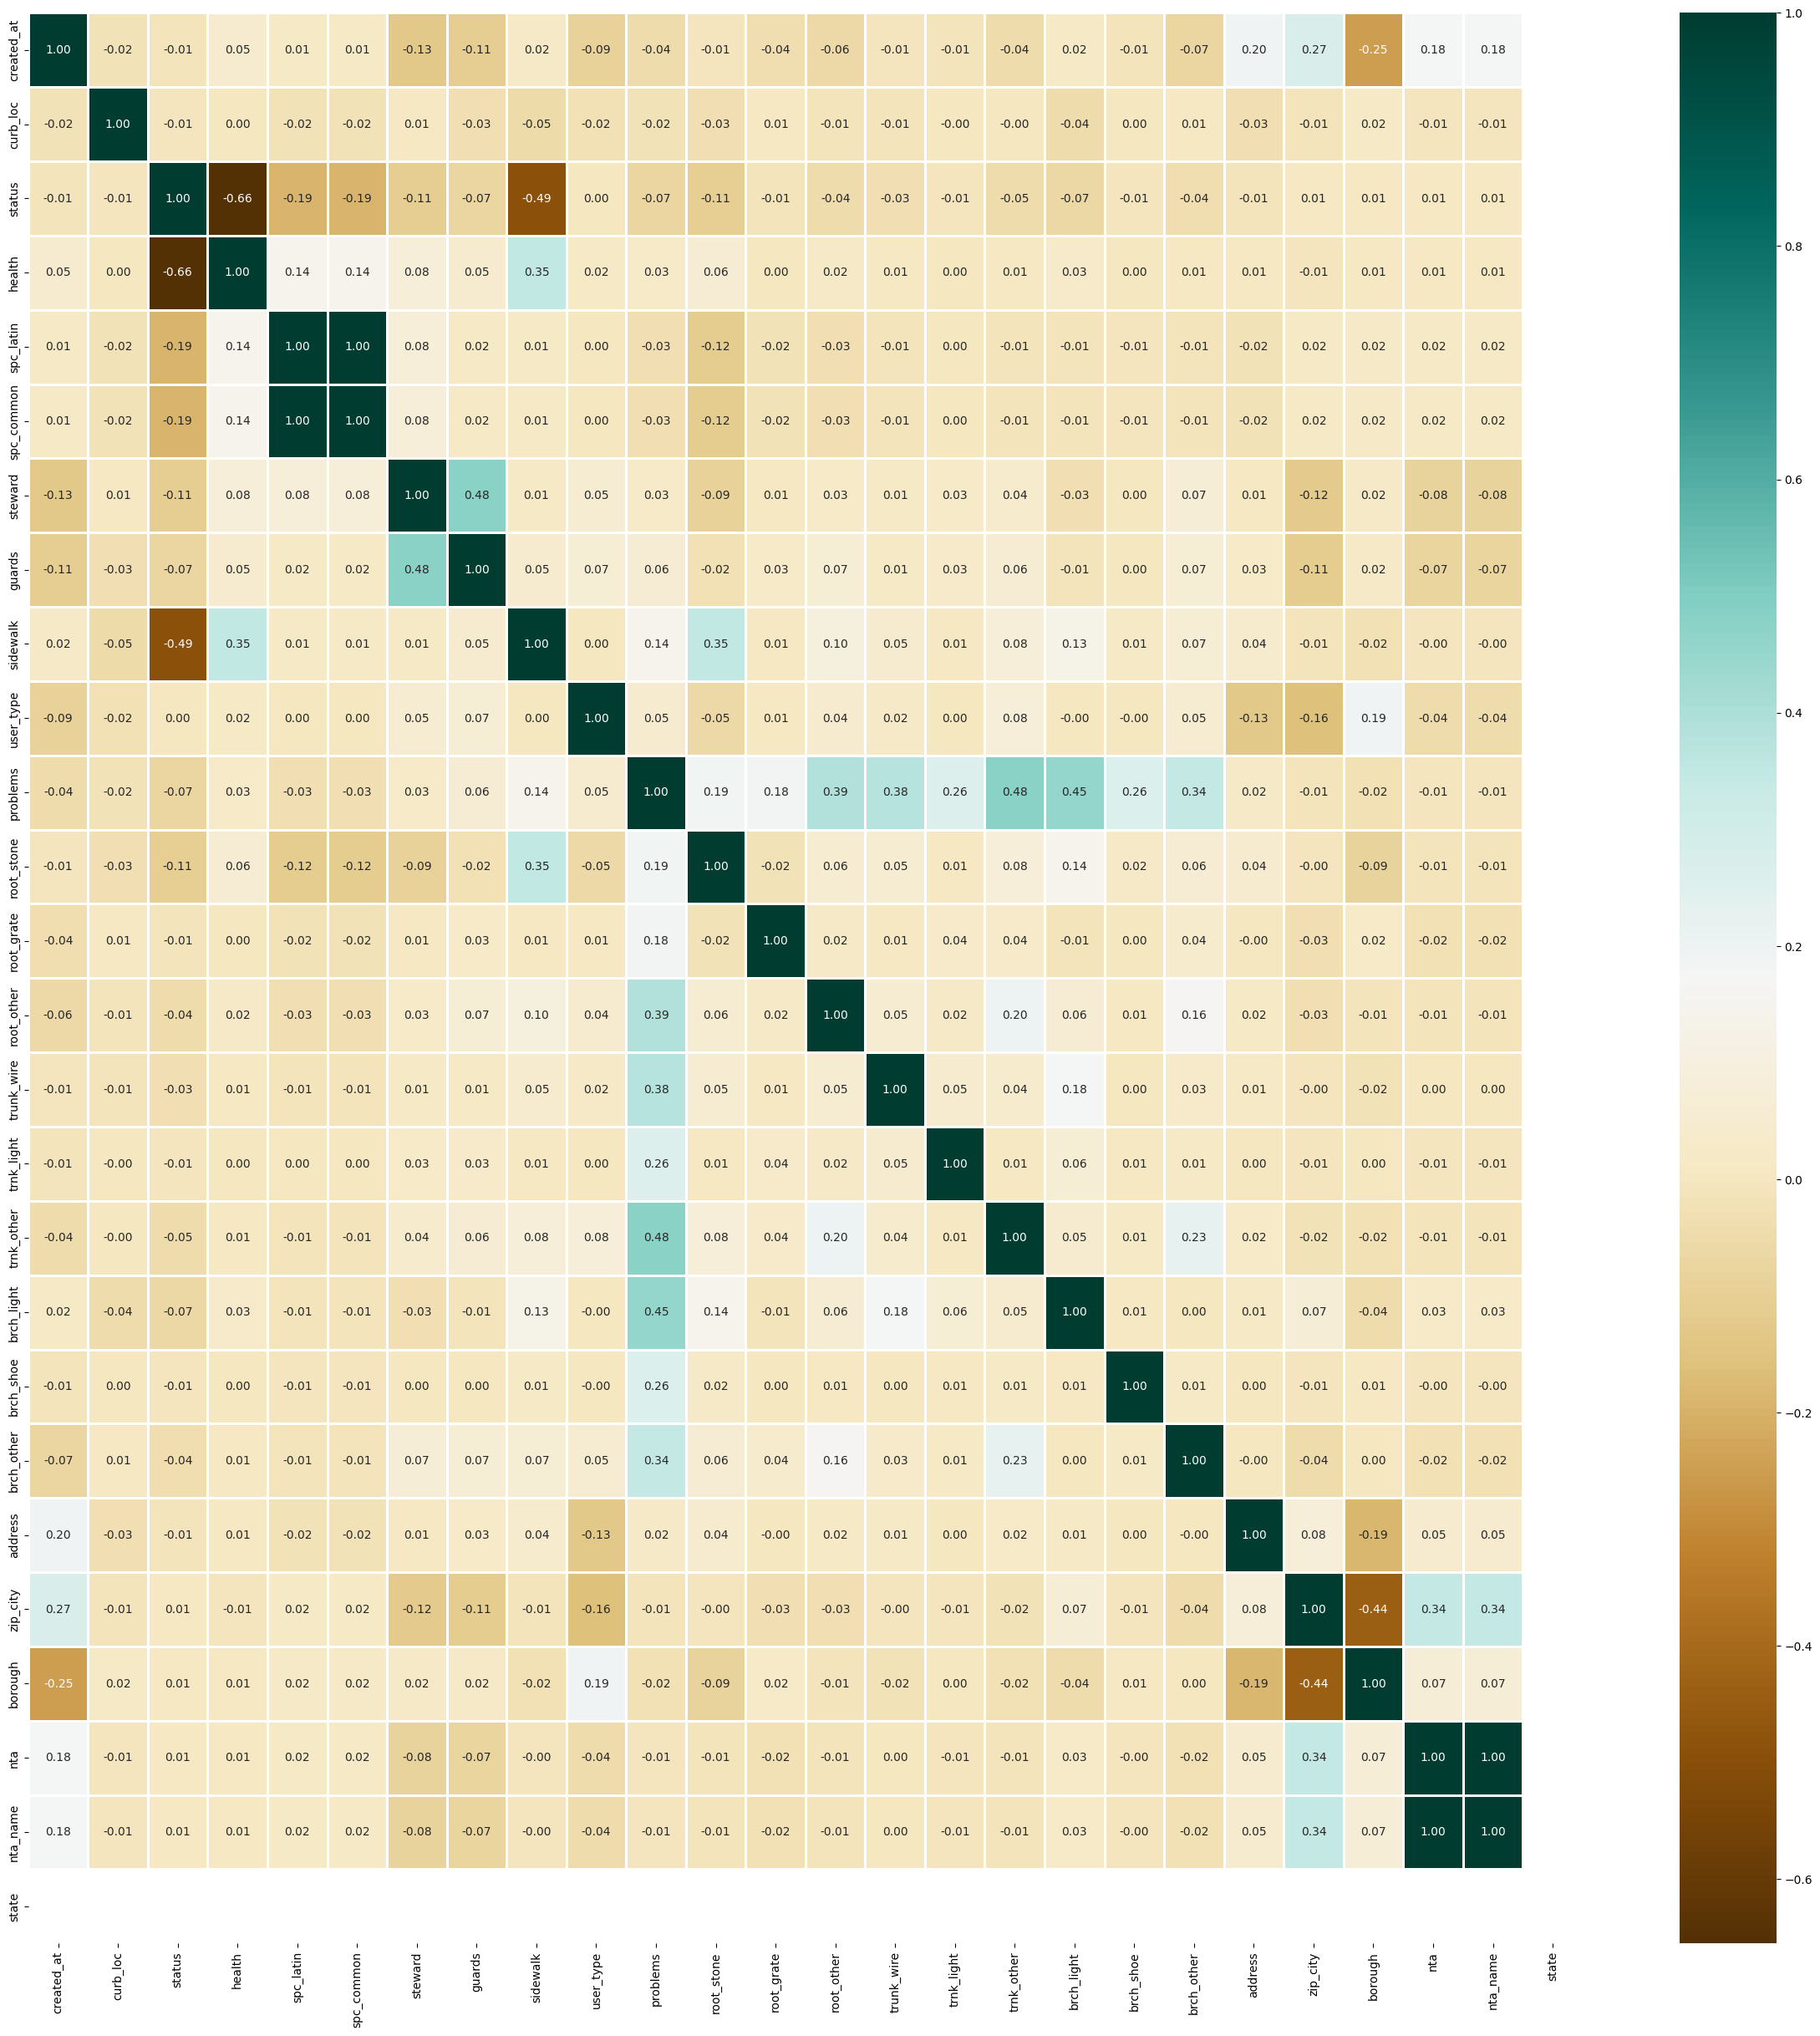

In [128]:
train_df_numeric = df.select_dtypes(exclude=['number'])
plt.figure(figsize=(30, 30))
sns.heatmap(train_df_numeric.apply(lambda x: x.factorize()[0]).corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [129]:
df['health'].fillna('Good',inplace=True)

In [130]:
df["health"].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

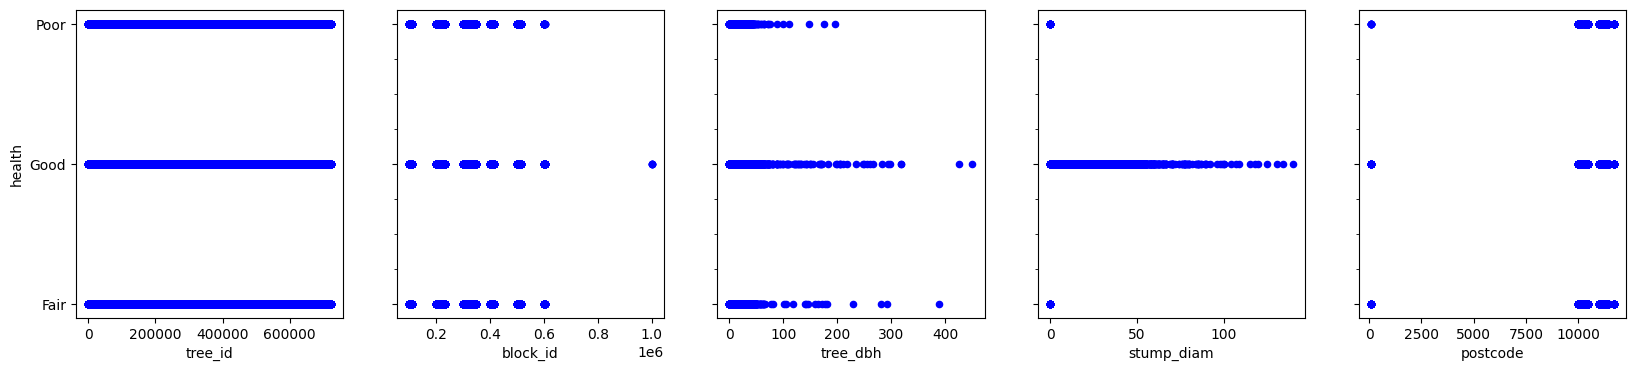

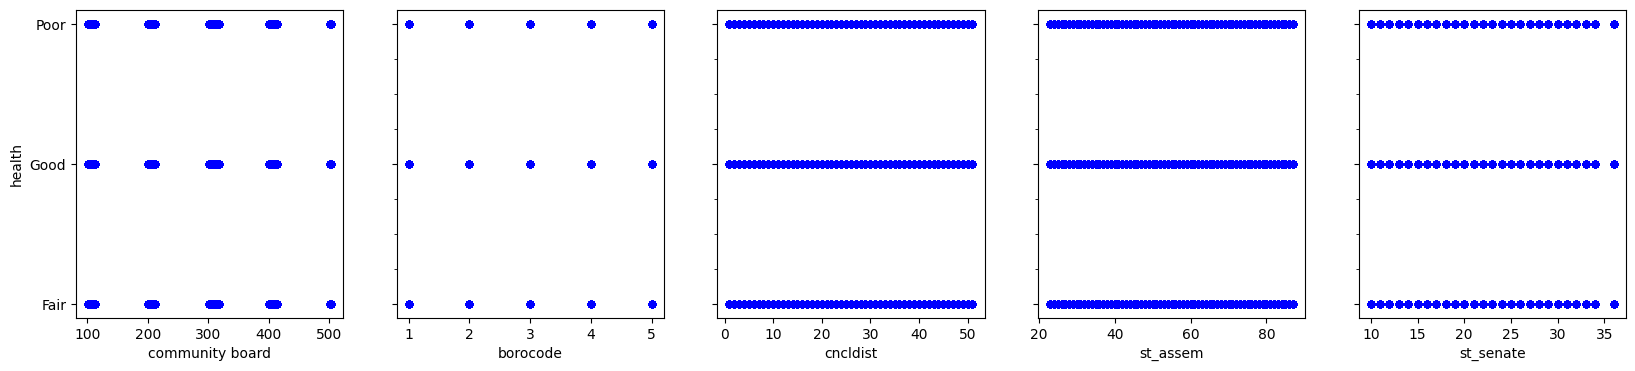

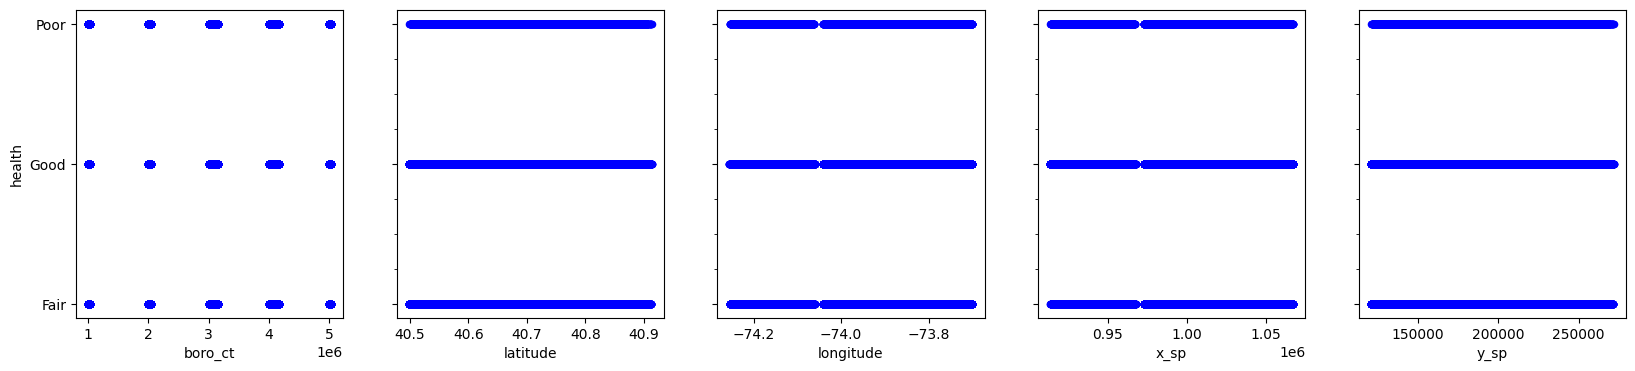

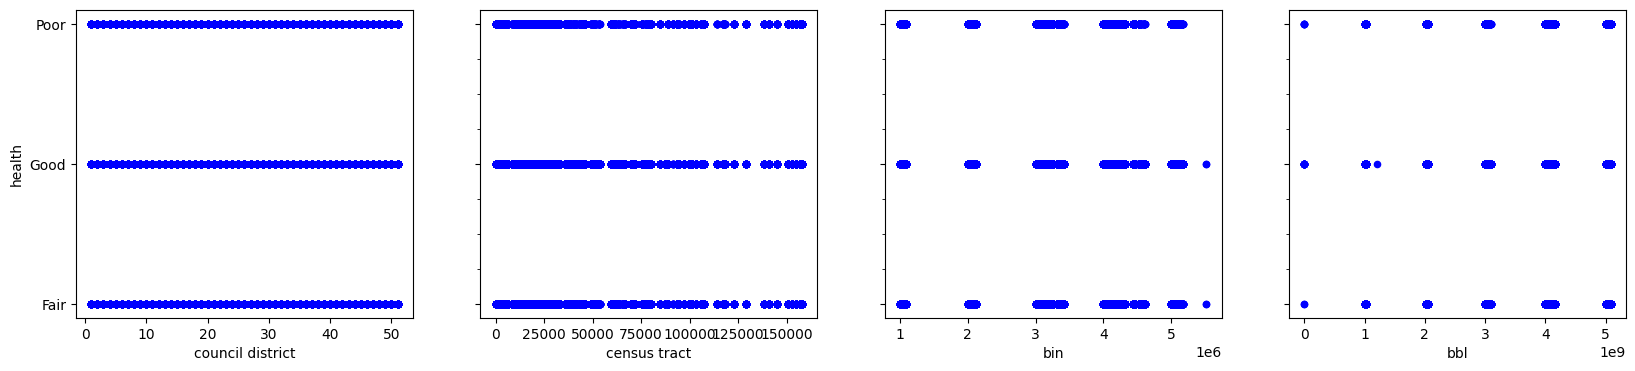

In [131]:
def show_graph_outlier_numeric(num_cols):
    fig, axes = plt.subplots(ncols=len(num_cols), nrows=1, figsize=(20, 4))
    axes = np.ravel(axes)
    for i, c in zip(range(len(num_cols)), num_cols):
        df.plot.scatter(ax=axes[i], x=c, y='health', sharey=True, colorbar=False, c='b')


def divide_chunks(l, n): 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

n = 5
x = list(divide_chunks(numeric_cols, n)) 
for chunk in x:
    show_graph_outlier_numeric(chunk)

In [132]:
df.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common steward  \
0  Alive   Fair                         Acer rubrum        red maple     NaN   
1  Alive   Fair                   Quercus palustris          pin oak     NaN   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust    1or2   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust     NaN   
4  Alive   Good                     Tilia americana  American linden     NaN   

  guards  sidewalk         user_type problems root_stone root_grate  \
0    NaN  NoDamage  TreesCount Staff      NaN         No         No   
1    NaN    Damage  TreesCount Staff   Stones        Yes         No   
2    NaN    Damage         Volunteer      NaN         No         No   
3    NaN    Damage         Volunteer   Stones        Yes         No   
4    NaN    Damage         Volunteer   Stones        Yes         No   

  root_other trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0         No         No         No         No         No        No         No   
1         No         No         No         No         No        No         No   
2         No         No         No         No         No        No         No   
3         No         No         No         No         No        No         No   
4         No         No         No         No         No        No         No   

             address  postcode      zip_city  community board  borocode  \
0  108-005 70 AVENUE     11375  Forest Hills              406         4   
1   147-074 7 AVENUE     11357    Whitestone              407         4   
2  390 MORGAN AVENUE     11211      Brooklyn              301         3   
3  1027 GRAND STREET     11211      Brooklyn              301         3   
4       603 6 STREET     11215      Brooklyn              306         3   

    borough  cncldist  st_assem  st_senate   nta            nta_name  boro_ct  \
0    Queens        29        28         16  QN17        Forest Hills  4073900   
1    Queens        19        27         11  QN49          Whitestone  4097300   
2  Brooklyn        34        50         18  BK90   East Williamsburg  3044900   
3  Brooklyn        34        53         18  BK90   East Williamsburg  3044900   
4  Brooklyn        39        44         21  BK37  Park Slope-Gowanus  3016500   

      state   latitude  longitude         x_sp         y_sp  council district  \
0  New York  40.723092 -73.844215  1027431.148  202756.7687              29.0   
1  New York  40.794111 -73.818679  1034455.701  228644.8374              19.0   
2  New York  40.717581 -73.936608  1001822.831  200716.8913              34.0   
3  New York  40.713537 -73.934456  1002420.358  199244.2531              34.0   
4  New York  40.666778 -73.975979   990913.775  182202.4260              39.0   

   census tract        bin           bbl  
0         739.0  4052307.0  4.022210e+09  
1         973.0  4101931.0  4.044750e+09  
2         449.0  3338310.0  3.028870e+09  
3         449.0  3338342.0  3.029250e+09  
4         165.0  3025654.0  3.010850e+09

In [133]:
df_geo = df[['zip_city','state', 'latitude', 'longitude']].copy()

In [134]:
gdf = gpd.GeoDataFrame(
    df_geo, geometry=gpd.points_from_xy(df_geo.longitude, df_geo.latitude), crs="EPSG:4326"
)

In [135]:
geometry=gpd.points_from_xy(df_geo.longitude, df_geo.latitude)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


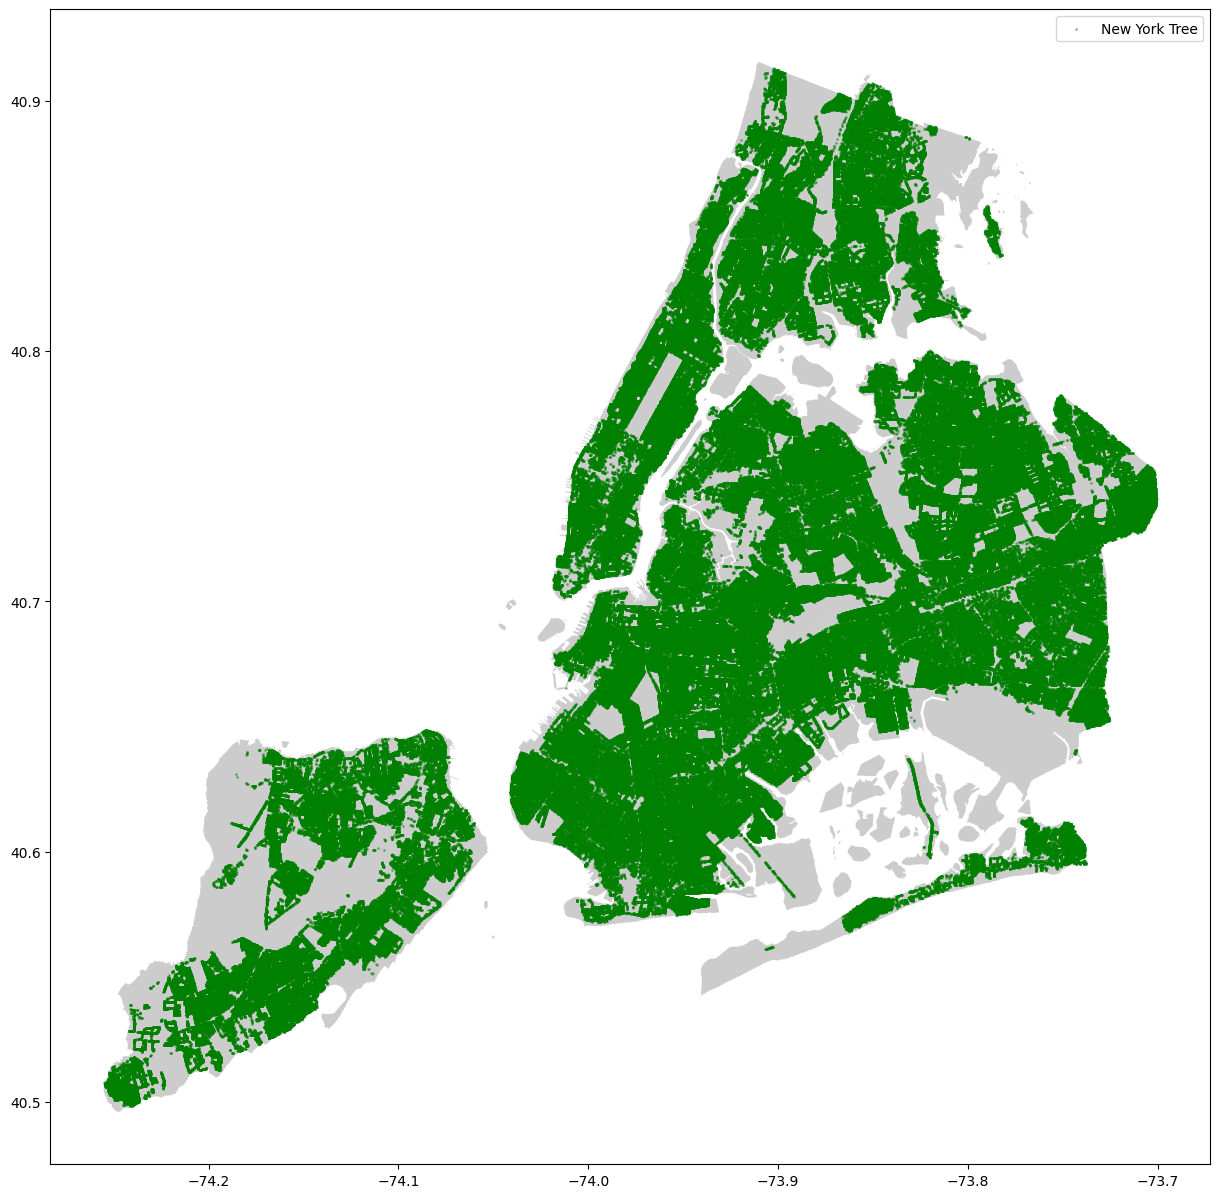

In [136]:
crs={'init':'epsg:4326'}

boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))

geo_df=gpd.GeoDataFrame(df_geo,crs=crs,geometry=geometry)

fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=1, alpha=0.4,color="green", label="New York Tree")
plt.legend()
